In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test)
    # Predecir las clases
    y_pred_proba = modelo_mlp.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    # Calcular las métricas de precisión, recall y F1-score
    precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    return test_accuracy, precision, recall, f1
# Leer los datos de los cuatro modelos
resultados_modelo1 = pd.read_csv("resultados_totales_agenteuno.csv")
resultados_modelo2 = pd.read_csv("resultados_totales_dosgentetodoparcial.csv")
resultados_modelo3 = pd.read_csv("resultados_totales_cuatroagentes.csv")
resultados_modelo4 = pd.read_csv("resultados_totales_ochoagentes.csv")

# Dividir los datos en características (X) y etiquetas (y)
X1 = resultados_modelo1.drop('Etiqueta_Verdadera', axis=1)
y1 = resultados_modelo1['Etiqueta_Verdadera']
X2 = resultados_modelo2.drop('Etiqueta_Verdadera', axis=1)
y2 = resultados_modelo2['Etiqueta_Verdadera']
X3 = resultados_modelo3.drop('Etiqueta_Verdadera', axis=1)
y3 = resultados_modelo3['Etiqueta_Verdadera']
X4 = resultados_modelo4.drop('Etiqueta_Verdadera', axis=1)
y4 = resultados_modelo4['Etiqueta_Verdadera']

# One-hot encode las etiquetas para clasificación multiclase
y_one_hot1 = to_categorical(y1, num_classes=10)
y_one_hot2 = to_categorical(y2, num_classes=10)
y_one_hot3 = to_categorical(y3, num_classes=10)
y_one_hot4 = to_categorical(y4, num_classes=10)

# Dividir los conjuntos de datos en entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y_one_hot1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_one_hot2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y_one_hot3, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y_one_hot4, test_size=0.2, random_state=42)

# Entrenar y evaluar cada modelo
acc1, precision1, recall1, f1_score1 = train_and_evaluate_model(X_train1, y_train1, X_test1, y_test1)
acc2, precision2, recall2, f1_score2 = train_and_evaluate_model(X_train2, y_train2, X_test2, y_test2)
acc3, precision3, recall3, f1_score3 = train_and_evaluate_model(X_train3, y_train3, X_test3, y_test3)
acc4, precision4, recall4, f1_score4 = train_and_evaluate_model(X_train4, y_train4, X_test4, y_test4)

# Graficar las métricas
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-score']
modelos = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4']
valores = [[acc1, precision1, recall1, f1_score1],
           [acc2, precision2, recall2, f1_score2],
           [acc3, precision3, recall3, f1_score3],
           [acc4, precision4, recall4, f1_score4]]

plt.figure(figsize=(10, 6))
for i in range(len(metricas)):
    plt.plot(modelos, [val[i] for val in valores], marker='o', label=metricas[i])

plt.title('Comparación de Métricas entre los Modelos')
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('comparacion_metricas.png')
plt.show()


KeyboardInterrupt: 

In [4]:
import pandas as pd
import numpy as np  # Agrega esta línea para importar numpy
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test)
    # Predecir las clases
    y_pred_proba = modelo_mlp.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    # Calcular las métricas de precisión, recall y F1-score
    precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    return test_accuracy, precision, recall, f1

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    acc, precision, recall, f1_score = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # Almacenar las métricas
    metricas_modelos.append((acc, precision, recall, f1_score))

# Nombres de los modelos obtenidos de los nombres de los archivos CSV
nombres_modelos = [archivo.split('.')[0] for archivo in archivos_csv]

# Métricas a graficar
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Graficar las métricas
plt.figure(figsize=(10, 6))
for i in range(len(metricas)):
    plt.plot(nombres_modelos, [metricas[i] for metricas in metricas_modelos], marker='o', label=metricas[i])

plt.title('Comparación de Métricas entre los Modelos')
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('comparacion_metricas.png')
plt.show()


188/188 [==============================] - 0s 903us/step


TypeError: 'numpy.float64' object is not callable

188/188 [==============================] - 0s 885us/step


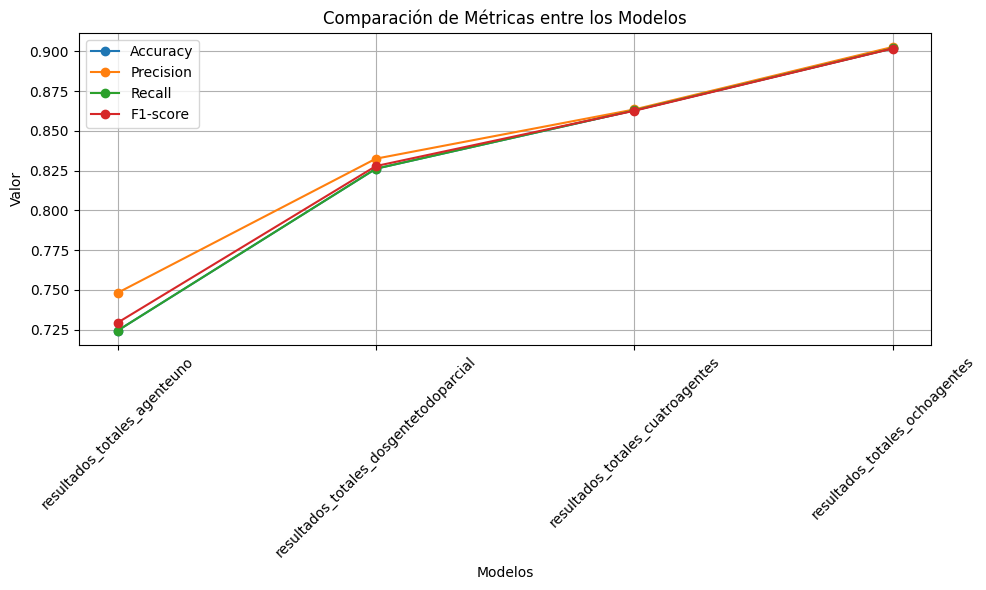

In [5]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test)
    # Predecir las clases
    y_pred_proba = modelo_mlp.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    # Calcular las métricas de precisión, recall y F1-score
    precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1_value = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')  # Cambiar el nombre a f1_value
    return test_accuracy, precision, recall, f1_value

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    acc, precision, recall, f1_value = train_and_evaluate_model(X_train, y_train, X_test, y_test)  # Cambiar el nombre de f1_score a f1_value
    # Almacenar las métricas
    metricas_modelos.append((acc, precision, recall, f1_value))

# Nombres de los modelos obtenidos de los nombres de los archivos CSV
nombres_modelos = [archivo.split('.')[0] for archivo in archivos_csv]

# Métricas a graficar
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Graficar las métricas
plt.figure(figsize=(10, 6))
for i in range(len(metricas)):
    plt.plot(nombres_modelos, [metricas[i] for metricas in metricas_modelos], marker='o', label=metricas[i])

plt.title('Comparación de Métricas entre los Modelos')
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('comparacion_metricas.png')
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    history = modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de entrenamiento
    train_loss, train_accuracy = modelo_mlp.evaluate(X_train_scaled, y_train, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test, verbose=0)
    # Predecir las clases para los conjuntos de prueba
    y_pred_proba_test = modelo_mlp.predict(X_test_scaled)
    y_pred_test = np.argmax(y_pred_proba_test, axis=1)
    # Calcular las métricas de precisión, recall y F1-score para los conjuntos de prueba
    precision_test = precision_score(y_test.argmax(axis=1), y_pred_test, average='weighted')
    recall_test = recall_score(y_test.argmax(axis=1), y_pred_test, average='weighted')
    f1_test = f1_score(y_test.argmax(axis=1), y_pred_test, average='weighted')
    # Predecir las clases para los conjuntos de entrenamiento
    y_pred_proba_train = modelo_mlp.predict(X_train_scaled)
    y_pred_train = np.argmax(y_pred_proba_train, axis=1)
    # Calcular las métricas de precisión, recall y F1-score para los conjuntos de entrenamiento
    precision_train = precision_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    recall_train = recall_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    f1_train = f1_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    return train_accuracy, train_loss, test_accuracy, test_loss, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test, history

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    train_acc, train_loss, test_acc, test_loss, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test, history = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # Almacenar las métricas
    metricas_modelos.append((archivo.split('.')[0], train_acc, train_loss, test_acc, test_loss, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test, history))

# Nombres de los modelos obtenidos de los nombres de los archivos CSV
nombres_modelos = [archivo.split('.')[0] for archivo in archivos_csv]

# Métricas a graficar
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Crear lista para métricas de entrenamiento
data_train = []
for modelo, train_acc, train_loss, _, _, precision_train, recall_train, f1_train, _, _, _, _ in metricas_modelos:
    data_train.append([modelo, train_acc, train_loss, precision_train, recall_train, f1_train])

# Crear lista para métricas de prueba
data_test = []
for modelo, _, _, test_acc, test_loss, _, _, _, precision_test, recall_test, f1_test, _ in metricas_modelos:
    data_test.append([modelo, test_acc, test_loss, precision_test, recall_test, f1_test])

# Crear DataFrame para métricas de entrenamiento
df_train = pd.DataFrame(data_train, columns=['Modelo', 'Train Accuracy', 'Train Loss', 'Precision Train', 'Recall Train', 'F1-score Train'])

# Crear DataFrame para métricas de prueba
df_test = pd.DataFrame(data_test, columns=['Modelo', 'Test Accuracy', 'Test Loss', 'Precision Test', 'Recall Test', 'F1-score Test'])


# Imprimir métricas de entrenamiento en pantalla
print("Métricas de Entrenamiento:")
print(df_train)

# Imprimir métricas de prueba en pantalla
print("\nMétricas de Prueba:")
print(df_test)

# Guardar tablas como imágenes
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_train.values, colLabels=df_train.columns, loc='center')
plt.title('Métricas de Entrenamiento')
plt.savefig('metricas_entrenamiento.png')
plt.close()

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_test.values, colLabels=df_test.columns, loc='center')
plt.title('Métricas de Prueba')
plt.savefig('metricas_prueba.png')
plt.close()
# Función para guardar tablas como imágenes sin título y con un tamaño más grande
def save_table_as_image(df, filename):
    fig, ax = plt.subplots(figsize=(12, 8))  # Aumentar el tamaño de la figura
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Ajustar tamaño de la fuente
    table.auto_set_column_width(col=list(range(len(df.columns))))  # Ajustar ancho de columnas automáticamente
    plt.savefig(filename, bbox_inches='tight')  # Guardar con bordes ajustados
    plt.close()

# Guardar las tablas como imágenes más grandes y sin título
save_table_as_image(df_train, 'metricas_entrenamiento_grande.png')
save_table_as_image(df_test, 'metricas_prueba_grande.png')


750/750 [==============================] - 1s 795us/step
Métricas de Entrenamiento:
                                   Modelo  Train Accuracy  Train Loss   
0            resultados_totales_agenteuno        0.747417    0.740087  \
1  resultados_totales_dosgentetodoparcial        0.865417    0.404192   
2        resultados_totales_cuatroagentes        0.944125    0.219029   
3          resultados_totales_ochoagentes        0.978000    0.169754   

   Precision Train  Recall Train  F1-score Train  
0         0.781720      0.747417        0.751667  
1         0.868704      0.865417        0.866099  
2         0.945057      0.944125        0.944303  
3         0.978041      0.978000        0.977989  

Métricas de Prueba:
                                   Modelo  Test Accuracy  Test Loss   
0            resultados_totales_agenteuno       0.726500   0.834628  \
1  resultados_totales_dosgentetodoparcial       0.822000   0.620158   
2        resultados_totales_cuatroagentes       0.860333   0.

188/188 [==============================] - 0s 879us/step


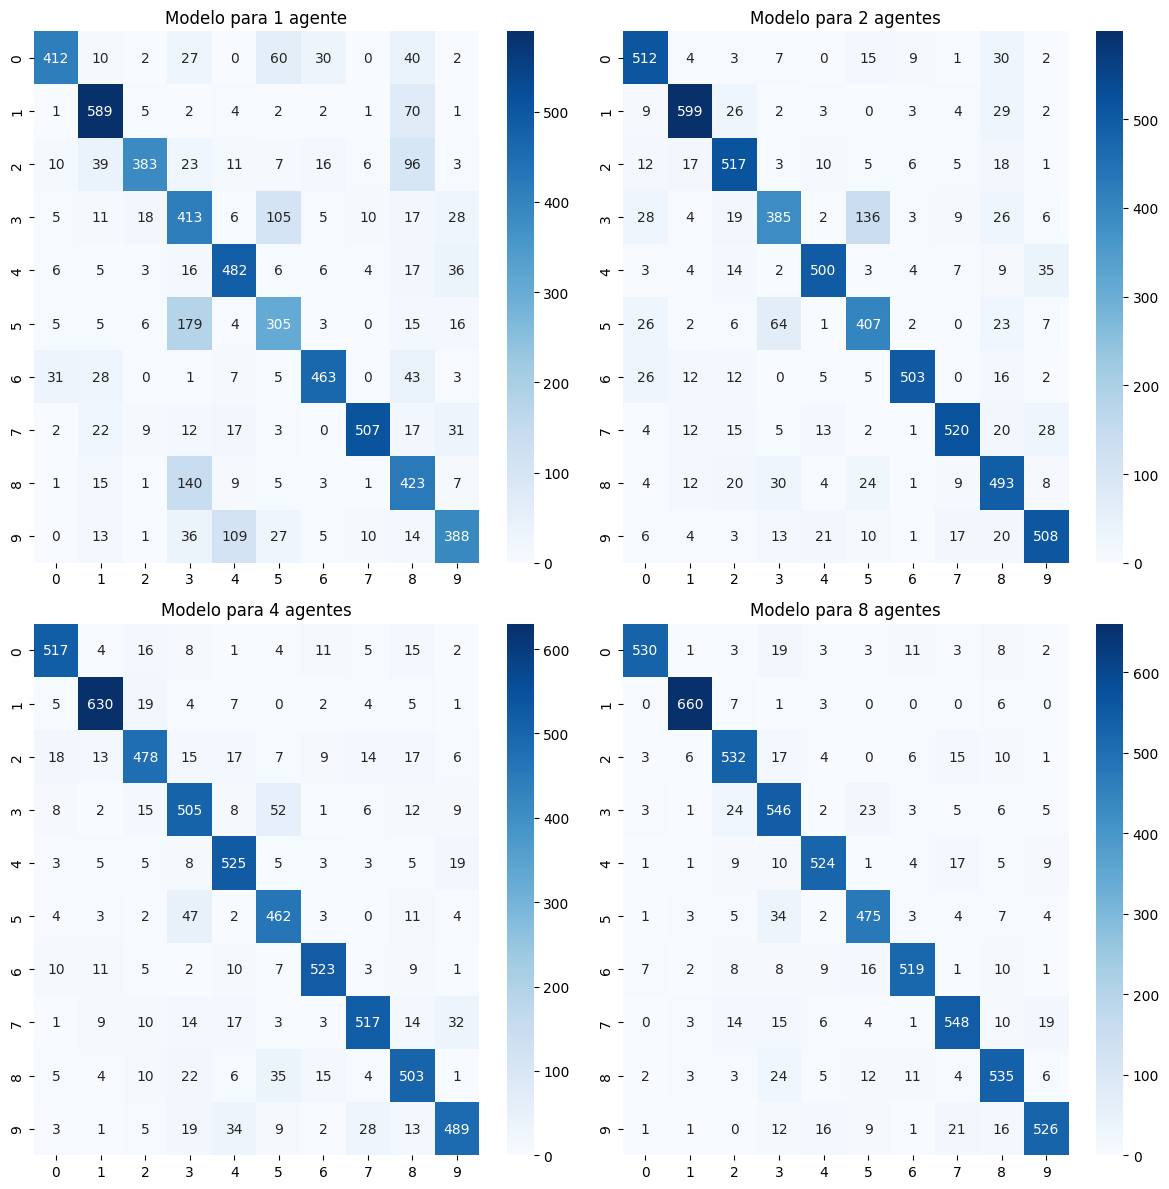

188/188 [==============================] - 0s 884us/step


ValueError: not enough values to unpack (expected 11, got 10)

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Predecir las clases para los conjuntos de prueba
    y_pred_proba_test = modelo_mlp.predict(X_test_scaled)
    y_pred_test = np.argmax(y_pred_proba_test, axis=1)
    # Calcular la matriz de confusión para el conjunto de prueba
    cm_test = confusion_matrix(y_test.argmax(axis=1), y_pred_test)
    return cm_test

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las matrices de confusión de prueba para cada modelo
conf_matrices_test = []

# Etiquetas para cada modelo
etiquetas_modelos = ["1 agente", "2 agentes", "4 agentes", "8 agentes"]

# Iterar sobre cada archivo CSV
for archivo, etiqueta_modelo in zip(archivos_csv, etiquetas_modelos):
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Calcular y almacenar la matriz de confusión de prueba
    cm_test = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    conf_matrices_test.append((etiqueta_modelo, cm_test))

# Visualizar las matrices de confusión para cada modelo en una sola imagen
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for (etiqueta_modelo, cm_test), ax in zip(conf_matrices_test, axes.flat):
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Modelo para {etiqueta_modelo}")

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Guardar la imagen con las cuatro matrices de confusión
plt.savefig('matrices_confusiontotal.png')

# Mostrar la imagen
plt.show()
# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Nombres de los modelos según el número de agentes
nombres_modelos = ['1 Agente', '2 Agentes', '4 Agentes', '8 Agentes']

# Iterar sobre cada archivo CSV
for archivo, nombre_modelo in zip(archivos_csv, nombres_modelos):
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    train_acc, train_loss, test_acc, test_loss, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test, history = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # Almacenar las métricas
    metricas_modelos.append((nombre_modelo, train_acc, train_loss, test_acc, test_loss, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test, history))

# Métricas a graficar
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Crear gráficas para la evolución de Accuracy y Loss para cada modelo
plt.figure(figsize=(15, 10))

# Graficar la evolución del Accuracy para cada modelo
for i, (nombre_modelo, _, _, _, _, _, _, _, _, _, _, history) in enumerate(metricas_modelos):
    plt.subplot(2, 2, i + 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'Evolución de Accuracy - {nombre_modelo}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.savefig('evolucion_accuracy.png')
plt.close()

# Crear gráficas para la evolución de Loss para cada modelo
plt.figure(figsize=(15, 10))

# Graficar la evolución del Loss para cada modelo
for i, (nombre_modelo, _, _, _, _, _, _, _, _, _, _, history) in enumerate(metricas_modelos):
    plt.subplot(2, 2, i + 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'Evolución de Loss - {nombre_modelo}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.savefig('evolucion_loss.png')
plt.close()


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    history = modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de entrenamiento
    train_loss, train_accuracy = modelo_mlp.evaluate(X_train_scaled, y_train, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test, verbose=0)
    # Predecir las clases para los conjuntos de prueba
    y_pred_proba_test = modelo_mlp.predict(X_test_scaled)
    y_pred_test = np.argmax(y_pred_proba_test, axis=1)
    # Calcular las métricas de precisión, recall y F1-score para los conjuntos de prueba
    precision_test = precision_score(y_test.argmax(axis=1), y_pred_test, average='weighted')
    recall_test = recall_score(y_test.argmax(axis=1), y_pred_test, average='weighted')
    f1_test = f1_score(y_test.argmax(axis=1), y_pred_test, average='weighted')
    # Predecir las clases para los conjuntos de entrenamiento
    y_pred_proba_train = modelo_mlp.predict(X_train_scaled)
    y_pred_train = np.argmax(y_pred_proba_train, axis=1)
    # Calcular las métricas de precisión, recall y F1-score para los conjuntos de entrenamiento
    precision_train = precision_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    recall_train = recall_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    f1_train = f1_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    return train_accuracy, train_loss, test_accuracy, test_loss, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test, history

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Nombres de los modelos según el número de agentes
nombres_modelos = ['1 Agente', '2 Agentes', '4 Agentes', '8 Agentes']

# Iterar sobre cada archivo CSV
for archivo, nombre_modelo in zip(archivos_csv, nombres_modelos):
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    train_acc, train_loss, test_acc, test_loss, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test, history = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # Almacenar las métricas
    metricas_modelos.append((nombre_modelo, train_acc, train_loss, test_acc, test_loss, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test, history))

# Métricas a graficar
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Crear gráficas para la evolución de Accuracy y Loss para cada modelo
plt.figure(figsize=(15, 10))

# Graficar la evolución del Accuracy para cada modelo
for i, (nombre_modelo, _, _, _, _, _, _, _, _, _, _, history) in enumerate(metricas_modelos):
    plt.subplot(2, 2, i + 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'Evolución de Accuracy - {nombre_modelo}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.savefig('evolucion_accuracy.png')
plt.close()

# Crear gráficas para la evolución de Loss para cada modelo
plt.figure(figsize=(15, 10))

# Graficar la evolución del Loss para cada modelo
for i, (nombre_modelo, _, _, _, _, _, _, _, _, _, _, history) in enumerate(metricas_modelos):
    plt.subplot(2, 2, i + 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'Evolución de Loss - {nombre_modelo}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.savefig('evolucion_loss.png')
plt.close()


KeyboardInterrupt: 

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    history = modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de entrenamiento
    train_loss, train_accuracy = modelo_mlp.evaluate(X_train_scaled, y_train, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test, verbose=0)
    # Predecir las clases para los conjuntos de prueba
    y_pred_proba_test = modelo_mlp.predict(X_test_scaled)
    y_pred_test = np.argmax(y_pred_proba_test, axis=1)
    # Calcular las métricas de precisión, recall y F1-score para los conjuntos de prueba
    precision_test = precision_score(y_test.argmax(axis=1), y_pred_test, average='weighted')
    recall_test = recall_score(y_test.argmax(axis=1), y_pred_test, average='weighted')
    f1_test = f1_score(y_test.argmax(axis=1), y_pred_test, average='weighted')
    # Predecir las clases para los conjuntos de entrenamiento
    y_pred_proba_train = modelo_mlp.predict(X_train_scaled)
    y_pred_train = np.argmax(y_pred_proba_train, axis=1)
    # Calcular las métricas de precisión, recall y F1-score para los conjuntos de entrenamiento
    precision_train = precision_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    recall_train = recall_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    f1_train = f1_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    # Calcular la matriz de confusión para el conjunto de prueba
    cm_test = confusion_matrix(y_test.argmax(axis=1), y_pred_test)
    return train_accuracy, train_loss, test_accuracy, test_loss, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test, history, cm_test

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Lista para almacenar las matrices de confusión de prueba para cada modelo
conf_matrices_test = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    train_acc, train_loss, test_acc, test_loss, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test, history, cm_test = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # Almacenar las métricas
    metricas_modelos.append((archivo.split('.')[0], train_acc, train_loss, test_acc, test_loss, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test, history))
    # Almacenar la matriz de confusión de prueba
    conf_matrices_test.append((archivo.split('.')[0], cm_test))

# Nombres de los modelos obtenidos de los nombres de los archivos CSV
nombres_modelos = [archivo.split('.')[0] for archivo in archivos_csv]

# Métricas a graficar
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Crear lista para métricas de entrenamiento
data_train = []
for modelo, train_acc, train_loss, _, _, precision_train, recall_train, f1_train, _, _, _, _ in metricas_modelos:
    data_train.append([modelo, train_acc, train_loss, precision_train, recall_train, f1_train])

# Crear lista para métricas de prueba
data_test = []
for modelo, _, _, test_acc, test_loss, _, _, _, precision_test, recall_test, f1_test, _ in metricas_modelos:
    data_test.append([modelo, test_acc, test_loss, precision_test, recall_test, f1_test])

# Crear DataFrame para métricas de entrenamiento
df_train = pd.DataFrame(data_train, columns=['Modelo', 'Train Accuracy', 'Train Loss', 'Precision Train', 'Recall Train', 'F1-score Train'])

# Crear DataFrame para métricas de prueba
df_test = pd.DataFrame(data_test, columns=['Modelo', 'Test Accuracy', 'Test Loss', 'Precision Test', 'Recall Test', 'F1-score Test'])

# Imprimir métricas de entrenamiento en pantalla
print("Métricas de Entrenamiento:")
print(df_train)

# Imprimir métricas de prueba en pantalla
print("\nMétricas de Prueba:")
print(df_test)

# Guardar tablas como imágenes
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_train.values, colLabels=df_train.columns, loc='center')
plt.title('Métricas de Entrenamiento')
plt.savefig('metricas_entrenamiento.png')
plt.close()

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_test.values, colLabels=df_test.columns, loc='center')
plt.title('Métricas de Prueba')
plt.savefig('metricas_prueba.png')
plt.close()

# Visualizar las matrices de confusión para cada modelo
for i, (modelo, cm_test) in enumerate(conf_matrices_test):
    # Crear figura y ejes
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - Modelo: {modelo}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Verdadero")
    # Guardar la imagen
    plt.savefig(f'matriz_confusion_{modelo}.png')
    plt.close()


750/750 [==============================] - 1s 910us/step
Métricas de Entrenamiento:
                                   Modelo  Train Accuracy  Train Loss   
0            resultados_totales_agenteuno        0.745375    0.740916  \
1  resultados_totales_dosgentetodoparcial        0.868042    0.395803   
2        resultados_totales_cuatroagentes        0.946417    0.206727   
3          resultados_totales_ochoagentes        0.974250    0.194233   

   Precision Train  Recall Train  F1-score Train  
0         0.768337      0.745375        0.751110  
1         0.870059      0.868042        0.868575  
2         0.946569      0.946417        0.946385  
3         0.974383      0.974250        0.974212  

Métricas de Prueba:
                                   Modelo  Test Accuracy  Test Loss   
0            resultados_totales_agenteuno       0.726000   0.838930  \
1  resultados_totales_dosgentetodoparcial       0.824000   0.598505   
2        resultados_totales_cuatroagentes       0.863167   0.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Predecir las clases para los conjuntos de prueba
    y_pred_proba_test = modelo_mlp.predict(X_test_scaled)
    y_pred_test = np.argmax(y_pred_proba_test, axis=1)
    # Calcular la matriz de confusión para el conjunto de prueba
    cm_test = confusion_matrix(y_test.argmax(axis=1), y_pred_test)
    return cm_test

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las matrices de confusión de prueba para cada modelo
conf_matrices_test = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Calcular y almacenar la matriz de confusión de prueba
    cm_test = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    conf_matrices_test.append(cm_test)

# Visualizar las matrices de confusión para cada modelo en una sola imagen
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    sns.heatmap(conf_matrices_test[i], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Modelo {i+1}")

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Guardar la imagen con las cuatro matrices de confusión
plt.savefig('matrices_confusion_todoslosmodelos.png')

# Mostrar la imagen
plt.show()


188/188 [==============================] - 0s 1ms/step


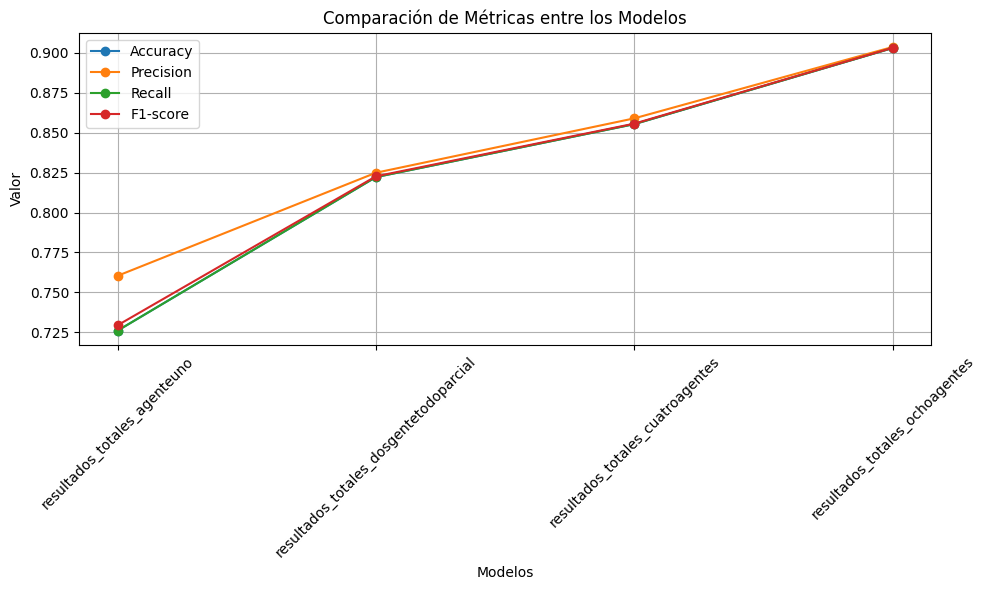

Resultados de cada métrica para comparar todos los modelos:
                                        Accuracy  Precision    Recall   
resultados_totales_agenteuno            0.726000   0.760353  0.726000  \
resultados_totales_dosgentetodoparcial  0.822167   0.824897  0.822167   
resultados_totales_cuatroagentes        0.855333   0.858961  0.855333   
resultados_totales_ochoagentes          0.903000   0.903644  0.903000   

                                        F1-score  
resultados_totales_agenteuno            0.729356  
resultados_totales_dosgentetodoparcial  0.822645  
resultados_totales_cuatroagentes        0.855642  
resultados_totales_ochoagentes          0.903107  


In [2]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test)
    # Predecir las clases
    y_pred_proba = modelo_mlp.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    # Calcular las métricas de precisión, recall y F1-score
    precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1_value = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')  # Cambiar el nombre a f1_value
    return test_accuracy, precision, recall, f1_value

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    acc, precision, recall, f1_value = train_and_evaluate_model(X_train, y_train, X_test, y_test)  # Cambiar el nombre de f1_score a f1_value
    # Almacenar las métricas
    metricas_modelos.append((acc, precision, recall, f1_value))

# Nombres de los modelos obtenidos de los nombres de los archivos CSV
nombres_modelos = [archivo.split('.')[0] for archivo in archivos_csv]

# Métricas a graficar
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Graficar las métricas
plt.figure(figsize=(10, 6))
for i in range(len(metricas)):
    plt.plot(nombres_modelos, [metricas[i] for metricas in metricas_modelos], marker='o', label=metricas[i])

plt.title('Comparación de Métricas entre los Modelos')
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('comparacion_metricas.png')
plt.show()

# Crear una tabla con los resultados de cada métrica para comparar todos los modelos
resultados_df = pd.DataFrame(metricas_modelos, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=nombres_modelos)
print("Resultados de cada métrica para comparar todos los modelos:")
print(resultados_df)


In [1]:
# Lista para almacenar las métricas de prueba de cada modelo
metricas_test_modelos = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    acc, precision, recall, f1_value = train_and_evaluate_model(X_train, y_train, X_test, y_test)  # Cambiar el nombre de f1_score a f1_value
    # Almacenar las métricas de prueba
    metricas_test_modelos.append((acc, precision, recall, f1_value))

# Nombres de los modelos obtenidos de los nombres de los archivos CSV
nombres_modelos = [archivo.split('.')[0] for archivo in archivos_csv]

# Crear una tabla con los resultados de entrenamiento de cada métrica
resultados_df = pd.DataFrame(metricas_modelos, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=nombres_modelos)
print("Resultados de entrenamiento de cada métrica para comparar todos los modelos:")
print(resultados_df)

# Crear una tabla con los resultados de prueba de cada métrica
resultados_test_df = pd.DataFrame(metricas_test_modelos, columns=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score'], index=nombres_modelos)
print("\nResultados de prueba de cada métrica para comparar todos los modelos:")
print(resultados_test_df)


NameError: name 'archivos_csv' is not defined

750/750 [==============================] - 1s 967us/step


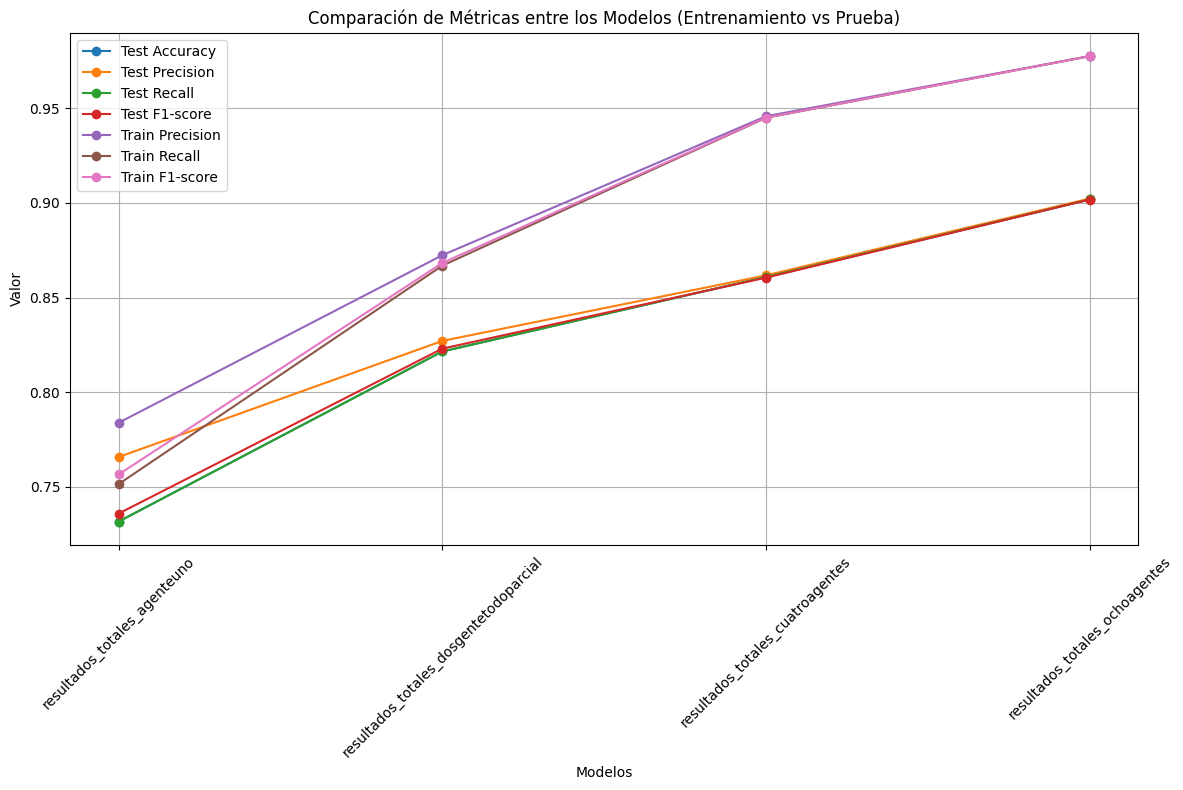

In [2]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    history = modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test)
    # Predecir las clases
    y_pred_proba = modelo_mlp.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    # Calcular las métricas de precisión, recall y F1-score para prueba
    precision_test = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall_test = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1_value_test = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    # Calcular las métricas de precisión, recall y F1-score para entrenamiento
    y_pred_train_proba = modelo_mlp.predict(X_train_scaled)
    y_pred_train = np.argmax(y_pred_train_proba, axis=1)
    precision_train = precision_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    recall_train = recall_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    f1_value_train = f1_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    return test_accuracy, precision_test, recall_test, f1_value_test, precision_train, recall_train, f1_value_train, history

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    test_acc, precision_test, recall_test, f1_test, precision_train, recall_train, f1_train, history = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # Almacenar las métricas
    metricas_modelos.append((test_acc, precision_test, recall_test, f1_test, precision_train, recall_train, f1_train, history))

# Nombres de los modelos obtenidos de los nombres de los archivos CSV
nombres_modelos = [archivo.split('.')[0] for archivo in archivos_csv]

# Métricas a graficar
metricas = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score', 'Train Precision', 'Train Recall', 'Train F1-score']

# Graficar las métricas
plt.figure(figsize=(12, 8))
for i in range(len(metricas)):
    plt.plot(nombres_modelos, [metricas[i] for metricas in metricas_modelos], marker='o', label=metricas[i])

plt.title('Comparación de Métricas entre los Modelos (Entrenamiento vs Prueba)')
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('comparacion_metricas_entrenamiento_prueba.png')
plt.show()


750/750 [==============================] - 1s 835us/step


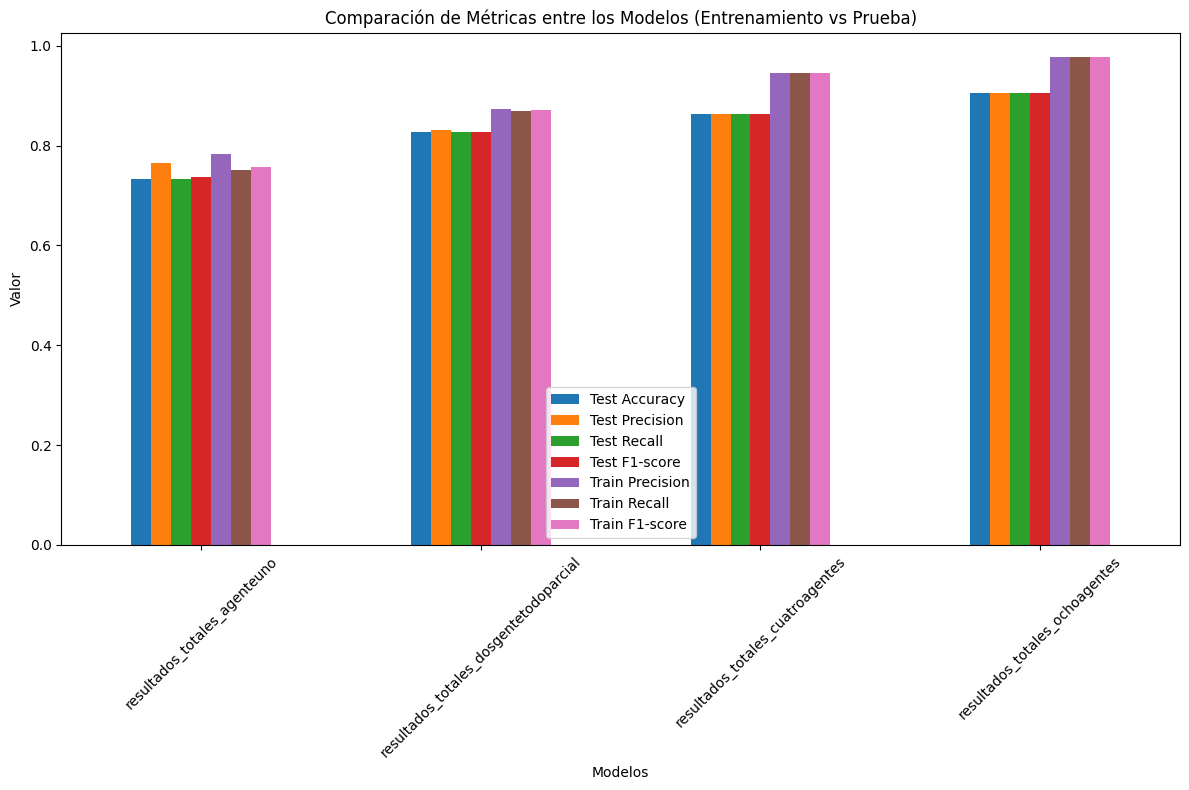

Métricas de prueba y entrenamiento para cada modelo:
                                        Test Accuracy  Test Precision   
resultados_totales_agenteuno                 0.732333        0.765912  \
resultados_totales_dosgentetodoparcial       0.826667        0.830916   
resultados_totales_cuatroagentes             0.863167        0.864421   
resultados_totales_ochoagentes               0.905833        0.906180   

                                        Test Recall  Test F1-score   
resultados_totales_agenteuno               0.732333       0.736362  \
resultados_totales_dosgentetodoparcial     0.826667       0.827578   
resultados_totales_cuatroagentes           0.863167       0.863027   
resultados_totales_ochoagentes             0.905833       0.905792   

                                        Train Precision  Train Recall   
resultados_totales_agenteuno                   0.784262      0.752083  \
resultados_totales_dosgentetodoparcial         0.873375      0.869708   
resultados_

In [3]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    history = modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test)
    # Predecir las clases
    y_pred_proba = modelo_mlp.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    # Calcular las métricas de precisión, recall y F1-score para prueba
    precision_test = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall_test = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1_value_test = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    # Calcular las métricas de precisión, recall y F1-score para entrenamiento
    y_pred_train_proba = modelo_mlp.predict(X_train_scaled)
    y_pred_train = np.argmax(y_pred_train_proba, axis=1)
    precision_train = precision_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    recall_train = recall_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    f1_value_train = f1_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    return test_accuracy, precision_test, recall_test, f1_value_test, precision_train, recall_train, f1_value_train

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    test_acc, precision_test, recall_test, f1_test, precision_train, recall_train, f1_train = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # Almacenar las métricas
    metricas_modelos.append((test_acc, precision_test, recall_test, f1_test, precision_train, recall_train, f1_train))

# Nombres de los modelos obtenidos de los nombres de los archivos CSV
nombres_modelos = [archivo.split('.')[0] for archivo in archivos_csv]

# Crear un DataFrame para las métricas de prueba y entrenamiento
metricas_df = pd.DataFrame(metricas_modelos, columns=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score', 'Train Precision', 'Train Recall', 'Train F1-score'], index=nombres_modelos)

# Graficar las métricas con un gráfico de barras
metricas_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparación de Métricas entre los Modelos (Entrenamiento vs Prueba)')
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('comparacion_metricas_entrenamiento_prueba.png')
plt.show()

# Mostrar las métricas en forma de tabla
print("Métricas de prueba y entrenamiento para cada modelo:")
print(metricas_df)


750/750 [==============================] - 1s 1ms/step


KeyError: "['Train Accuracy'] not in index"

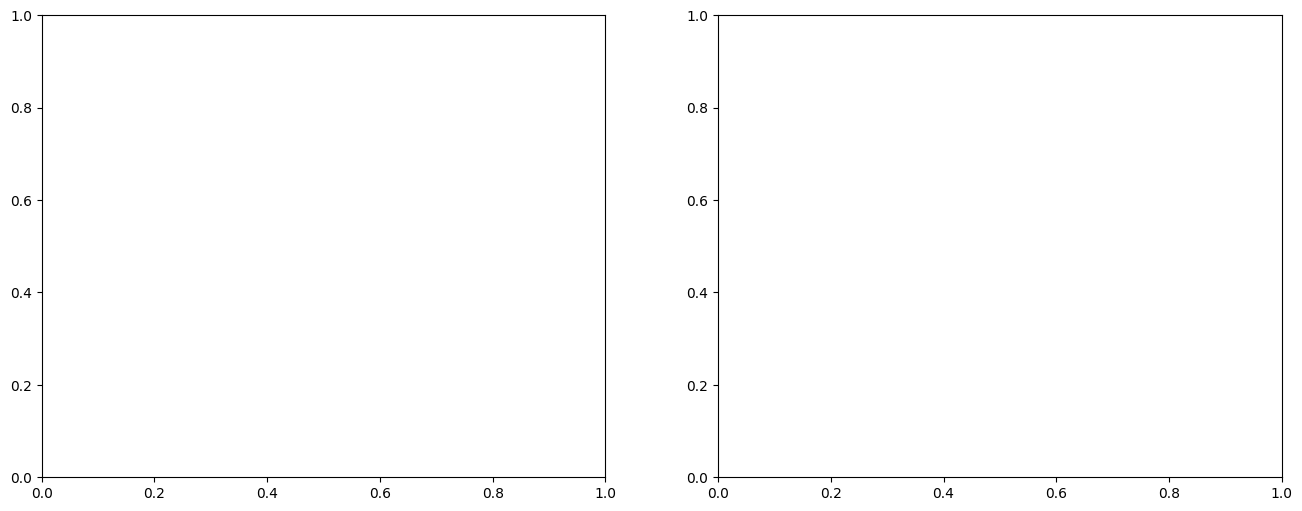

In [4]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    history = modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test)
    # Predecir las clases
    y_pred_proba = modelo_mlp.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    # Calcular las métricas de precisión, recall y F1-score para prueba
    precision_test = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall_test = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1_value_test = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    # Calcular las métricas de precisión, recall y F1-score para entrenamiento
    y_pred_train_proba = modelo_mlp.predict(X_train_scaled)
    y_pred_train = np.argmax(y_pred_train_proba, axis=1)
    precision_train = precision_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    recall_train = recall_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    f1_value_train = f1_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    return test_accuracy, precision_test, recall_test, f1_value_test, precision_train, recall_train, f1_value_train

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    test_acc, precision_test, recall_test, f1_test, precision_train, recall_train, f1_train = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # Almacenar las métricas
    metricas_modelos.append((test_acc, precision_test, recall_test, f1_test, precision_train, recall_train, f1_train))

# Nombres de los modelos obtenidos de los nombres de los archivos CSV
nombres_modelos = [archivo.split('.')[0] for archivo in archivos_csv]

# Crear un DataFrame para las métricas de prueba y entrenamiento
metricas_df = pd.DataFrame(metricas_modelos, columns=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score', 'Train Precision', 'Train Recall', 'Train F1-score'], index=nombres_modelos)

# Graficar las métricas con un gráfico de barras
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

metricas_df[['Test Accuracy', 'Train Accuracy']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Accuracy Comparison')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Value')
axes[0].legend(['Test', 'Train'])
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

metricas_df[['Test Precision', 'Test Recall', 'Test F1-score', 'Train Precision', 'Train Recall', 'Train F1-score']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Metrics Comparison')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Value')
axes[1].legend(['Test Precision', 'Test Recall', 'Test F1-score', 'Train Precision', 'Train Recall', 'Train F1-score'])
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('comparacion_metricas.png')
plt.show()

# Mostrar las métricas en forma de tabla
print("Métricas de prueba y entrenamiento para cada modelo:")
print(metricas_df)


750/750 [==============================] - 1s 904us/step


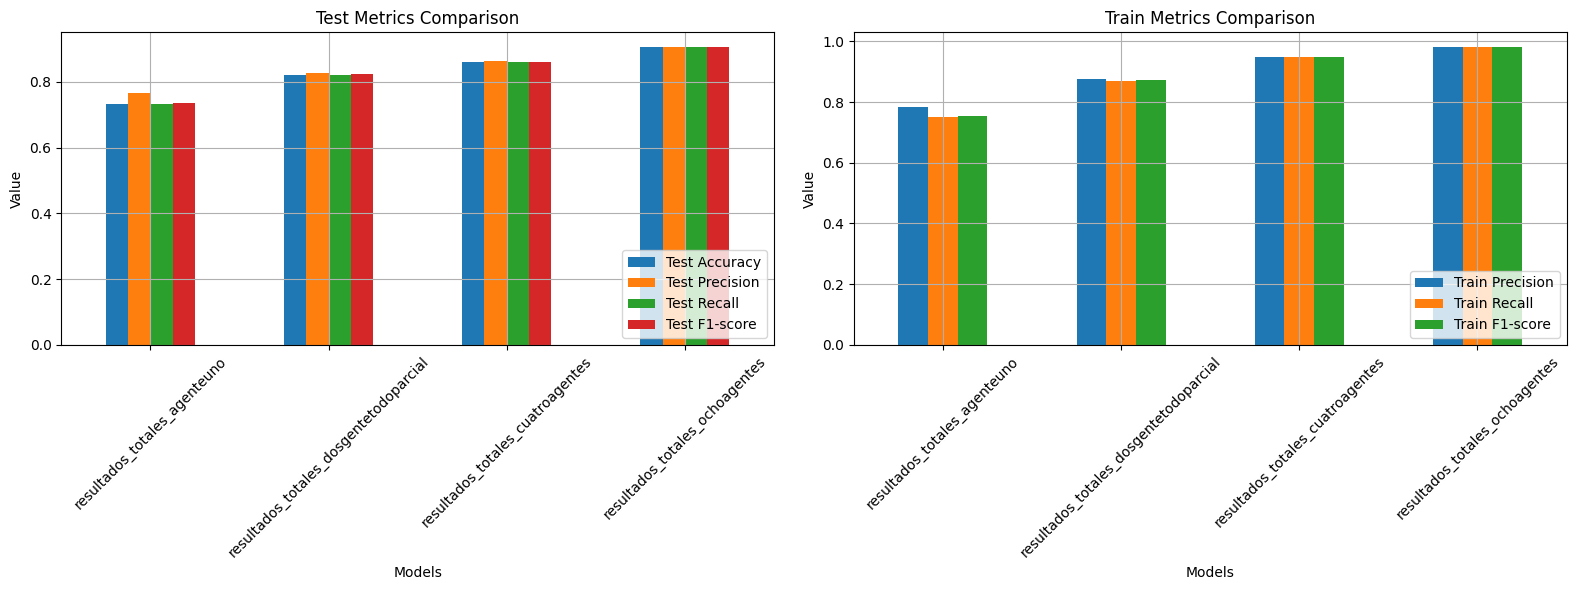

Métricas de prueba y entrenamiento para cada modelo:
                                        Test Accuracy  Test Precision   
resultados_totales_agenteuno                 0.732167        0.766572  \
resultados_totales_dosgentetodoparcial       0.822167        0.827181   
resultados_totales_cuatroagentes             0.860333        0.862951   
resultados_totales_ochoagentes               0.905167        0.905563   

                                        Test Recall  Test F1-score   
resultados_totales_agenteuno               0.732167       0.735738  \
resultados_totales_dosgentetodoparcial     0.822167       0.823133   
resultados_totales_cuatroagentes           0.860333       0.860326   
resultados_totales_ochoagentes             0.905167       0.904779   

                                        Train Precision  Train Recall   
resultados_totales_agenteuno                   0.782240      0.749917  \
resultados_totales_dosgentetodoparcial         0.876125      0.870958   
resultados_

In [5]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    history = modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test)
    # Predecir las clases
    y_pred_proba = modelo_mlp.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    # Calcular las métricas de precisión, recall y F1-score para prueba
    precision_test = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall_test = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1_value_test = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    # Calcular las métricas de precisión, recall y F1-score para entrenamiento
    y_pred_train_proba = modelo_mlp.predict(X_train_scaled)
    y_pred_train = np.argmax(y_pred_train_proba, axis=1)
    precision_train = precision_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    recall_train = recall_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    f1_value_train = f1_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    return test_accuracy, precision_test, recall_test, f1_value_test, precision_train, recall_train, f1_value_train

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    test_acc, precision_test, recall_test, f1_test, precision_train, recall_train, f1_train = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # Almacenar las métricas
    metricas_modelos.append((test_acc, precision_test, recall_test, f1_test, precision_train, recall_train, f1_train))

# Nombres de los modelos obtenidos de los nombres de los archivos CSV
nombres_modelos = [archivo.split('.')[0] for archivo in archivos_csv]

# Crear un DataFrame para las métricas de prueba y entrenamiento
metricas_df = pd.DataFrame(metricas_modelos, columns=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score', 'Train Precision', 'Train Recall', 'Train F1-score'], index=nombres_modelos)

# Graficar las métricas con un gráfico de barras
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

metricas_df[['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Test Metrics Comparison')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Value')
axes[0].legend(loc='lower right')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

metricas_df[['Train Precision', 'Train Recall', 'Train F1-score']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Train Metrics Comparison')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Value')
axes[1].legend(loc='lower right')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('comparacion_metricas.png')
plt.show()

# Mostrar las métricas en forma de tabla
print("Métricas de prueba y entrenamiento para cada modelo:")
print(metricas_df)


In [9]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Inicializar el escalador
    scaler = StandardScaler()
    # Ajustar y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)
    # Transformar los datos de prueba utilizando el mismo escalador
    X_test_scaled = scaler.transform(X_test)
    # Definir la arquitectura del modelo
    modelo_mlp = Sequential()
    modelo_mlp.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    modelo_mlp.add(Dense(128, activation='relu'))
    modelo_mlp.add(Dense(100, activation='relu'))
    modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases
    # Compilar el modelo
    modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Entrenar el modelo
    history = modelo_mlp.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)
    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = modelo_mlp.evaluate(X_test_scaled, y_test)
    # Predecir las clases
    y_pred_proba = modelo_mlp.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    # Calcular las métricas de precisión, recall y F1-score para prueba
    precision_test = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall_test = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1_value_test = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    # Calcular las métricas de precisión, recall y F1-score para entrenamiento
    y_pred_train_proba = modelo_mlp.predict(X_train_scaled)
    y_pred_train = np.argmax(y_pred_train_proba, axis=1)
    precision_train = precision_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    recall_train = recall_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    f1_value_train = f1_score(y_train.argmax(axis=1), y_pred_train, average='weighted')
    return test_accuracy, precision_test, recall_test, f1_value_test, precision_train, recall_train, f1_value_train

# Lista de nombres de archivos CSV
archivos_csv = ["resultados_totales_agenteuno.csv", "resultados_totales_dosgentetodoparcial.csv", 
                "resultados_totales_cuatroagentes.csv", "resultados_totales_ochoagentes.csv"]

# Lista para almacenar las métricas de cada modelo
metricas_modelos = []

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer los datos del archivo CSV
    resultados = pd.read_csv(archivo)
    # Dividir los datos en características (X) y etiquetas (y)
    X = resultados.drop('Etiqueta_Verdadera', axis=1)
    y = resultados['Etiqueta_Verdadera']
    # One-hot encode las etiquetas para clasificación multiclase
    y_one_hot = to_categorical(y, num_classes=10)
    # Dividir los conjuntos de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    # Entrenar y evaluar el modelo
    test_acc, precision_test, recall_test, f1_test, precision_train, recall_train, f1_train = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    # Almacenar las métricas
    metricas_modelos.append((test_acc, precision_test, recall_test, f1_test, precision_train, recall_train, f1_train))

# Nombres de las métricas
metricas_nombres = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1-score']

# Crear un DataFrame para las métricas de prueba y entrenamiento
metricas_df = pd.DataFrame(metricas_modelos, columns=metricas_nombres, index=archivos_csv)

# Graficar las métricas con un gráfico de barras
plt.figure(figsize=(10, 6 * len(metricas_nombres)))

for i, metrica_nombre in enumerate(metricas_nombres):
    plt.subplot(len(metricas_nombres), 1, i+1)
    metricas_df[metrica_nombre].plot(kind='bar')
    plt.title(f'{metrica_nombre} Comparison')
    plt.xlabel('Models')
    plt.ylabel('Value')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('comparacion_metricas.png')
plt.show()

# Guardar la tabla como una imagen
plt.figure(figsize=(10, 6))
plt.table(cellText=metricas_df.values, rowLabels=metricas_df.index, colLabels=metricas_df.columns, loc='center')
plt.axis('off')
plt.tight_layout()
plt.savefig('metricas_table.png')


750/750 [==============================] - 1s 993us/step


ValueError: 8 columns passed, passed data had 7 columns